<a href="https://colab.research.google.com/github/Shahsawar51/MY_DATA_SCIENCE_JOURNEY/blob/main/wk24_ss_52_batch_gradients_decent_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Session 52 (part 1):

 Batch Gradient Descent

● Types of Gradient Descent

● Mathematical formulation

● Code from scratch

## 🚀 **Step 1: Types of Gradient Descent**

Gradient Descent is an optimization algorithm used to minimize the cost function (or error) in machine learning models by updating the model's parameters iteratively. Depending on how much data you use in each iteration, there are three main types of Gradient Descent:

---

### 🔸 1. **Batch Gradient Descent (BGD)**  
- **Explanation:**  
  In **Batch Gradient Descent**, the algorithm uses the **entire training dataset** to calculate the gradient of the cost function with respect to the model parameters. It updates the parameters only **once per epoch** (one full pass through the dataset).  
  This makes it **computationally expensive** for large datasets but provides a **stable and accurate** update direction because it uses the complete dataset.  

- **Advantages:**  
  - More **stable convergence** since it uses the full dataset.  
  - **Accurate gradient estimation** because it considers all points.  
  - Works well for **small to medium-sized datasets**.

- **Disadvantages:**  
  - **Slow** for very large datasets (memory and computation issues).  
  - Can get **stuck in local minima** for complex cost functions.  
  - **Less frequent updates**, so may take longer to converge.

- **Example:**  
  If you have **1,000 data points**, Batch Gradient Descent will calculate the gradient for all **1,000 points** before updating the model parameters.

---

### 🔸 2. **Stochastic Gradient Descent (SGD)**  
- **Explanation:**  
  In **Stochastic Gradient Descent**, the algorithm updates the model parameters **one training example at a time**. It randomly picks a single data point, computes the gradient, and immediately updates the parameters.  
  This makes SGD **faster** and suitable for **large datasets**, but it introduces **more noise and instability** because updates are based on a single point.  

- **Advantages:**  
  - **Faster updates**, as it processes one data point at a time.  
  - Can **escape local minima** due to noisy updates.  
  - Suitable for **online learning** and **streaming data**.

- **Disadvantages:**  
  - **Highly noisy updates**, which can cause the loss function to fluctuate.  
  - **Slower convergence** as it doesn’t follow the exact descent direction.  
  - Might **miss the global minimum** due to its randomness.

- **Example:**  
  If you have **1,000 data points**, SGD will pick **one random point**, update the parameters, then pick another point, and repeat this process.

---

### 🔸 3. **Mini-Batch Gradient Descent (MBGD)**  
- **Explanation:**  
  **Mini-Batch Gradient Descent** is a compromise between **Batch** and **Stochastic** methods. It divides the dataset into **small batches** (like 32, 64, or 128 points), computes the gradient for each batch, and updates the parameters after processing the batch.  
  This balances **update speed** and **stability**, making it the most commonly used approach in practice (especially for deep learning).  

- **Advantages:**  
  - **Faster than Batch GD** but more stable than SGD.  
  - **Parallelizable** (you can use GPUs to speed it up).  
  - Reduces noise, leading to **smoother convergence**.

- **Disadvantages:**  
  - **Memory usage** depends on batch size.  
  - **Choosing the right batch size** can be tricky (too small = noisy, too large = slow).  
  - Might still **oscillate** around the global minimum, though less than SGD.

- **Example:**  
  If you have **1,000 data points** and set the batch size to **32**, MBGD will compute the gradient for **32 points**, update the parameters, then move to the next batch of **32 points**, and so on.

---

### ⚡ **Quick Summary:**  

| **Type**                   | **Data Processed Per Update** | **Speed** | **Stability** | **Best For**                        |
|----------------------------|------------------------------|------------|----------------|-------------------------------------|
| **Batch Gradient Descent** | Entire dataset               | Slow      | Very Stable    | Small/medium datasets, stable loss  |
| **Stochastic GD**          | 1 data point                 | Fast      | Noisy          | Large datasets, online learning     |
| **Mini-Batch GD**          | Small batch of data points   | Balanced  | Moderately stable | Large datasets, deep learning    |

---

### ✅ **Which One Should You Use?**  
- For **small datasets**, go for **Batch GD**.  
- For **massive datasets or real-time learning**, use **SGD**.  
- For a **balanced, practical solution**, use **Mini-Batch GD**.

Most modern ML frameworks (like TensorFlow and PyTorch) use **Mini-Batch GD** with techniques like **momentum** or **Adam** to speed up and stabilize training.

---

---

## 📘 **Step 2: Mathematical Formulation of Gradient Descent**

The goal of **Gradient Descent** is to **minimize the cost function** by updating the model parameters in the direction of the negative gradient (i.e., the steepest descent).

Let’s break this down carefully!

---

### 🔸 **1. Cost Function (Objective Function):**

The **cost function** tells us how far off our predictions are from the actual values. For Linear Regression, the most common cost function is the **Mean Squared Error (MSE)**:

\[
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - \hat{y_i} \right)^2
\]

Where:
- \( J(\theta) \) → Cost function  
- \( m \) → Number of training examples  
- \( y_i \) → Actual value of the \(i^{th}\) data point  
- \( \hat{y_i} \) → Predicted value for the \(i^{th}\) data point  
- \( \theta \) → Model parameters (like weights and bias)

For a simple linear regression:

\[
\hat{y_i} = \theta_0 + \theta_1 x_i
\]

Where:
- \( \theta_0 \) → Bias (intercept)  
- \( \theta_1 \) → Weight (slope)  

---

### 🔸 **2. Gradient of the Cost Function:**  

The **gradient** is the **partial derivative** of the cost function with respect to each parameter. It tells us the slope (or direction) in which the cost function is changing.

The gradients for the parameters are:

1. **For the bias term (\( \theta_0 \)):**

\[
\frac{\partial J(\theta)}{\partial \theta_0} = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i - \hat{y_i} \right)
\]

2. **For the weight term (\( \theta_1 \)):**

\[
\frac{\partial J(\theta)}{\partial \theta_1} = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i - \hat{y_i} \right) x_i
\]

---

### 🔸 **3. Update Rule (Gradient Descent Step):**  

Gradient Descent updates the parameters using the following formula:

\[
\theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
\]

Where:
- \( \theta_j \) → Model parameter (either \( \theta_0 \) or \( \theta_1 \))  
- \( \alpha \) → **Learning rate** (controls the step size)  
- \( \frac{\partial J(\theta)}{\partial \theta_j} \) → **Gradient** of the cost function with respect to parameter \( \theta_j \)

In simple terms:
- **Gradient tells you the direction** to move in.  
- **Learning rate controls how big your steps are.**  

For **Batch Gradient Descent**, this update happens after **processing the entire dataset**.

---

### 🔸 **4. Full Update Equations:**  

Putting everything together, the **parameter updates** become:

1. **Bias term (\( \theta_0 \)):**

\[
\theta_0 = \theta_0 - \alpha \left( -\frac{1}{m} \sum_{i=1}^{m} \left( y_i - \hat{y_i} \right) \right)
\]

2. **Weight term (\( \theta_1 \)):**

\[
\theta_1 = \theta_1 - \alpha \left( -\frac{1}{m} \sum_{i=1}^{m} \left( y_i - \hat{y_i} \right) x_i \right)
\]

After every iteration, the **cost function decreases**, and the parameters **move closer to the optimal values**.

---

### 🧠 **Key Insights:**  
- **Gradient tells the slope** → We move **opposite** to the gradient (negative direction) to minimize the cost.  
- **Learning rate (\( \alpha \)) matters:**  
  - **Small learning rate:** Slow but stable convergence  
  - **Large learning rate:** Fast but might overshoot the minimum  
- **Convex functions (like MSE)** → Gradient Descent always converges to the **global minimum**.

---

### ⚡ **Visualization:**  
Imagine you’re on a **mountain**. The **cost function** is the height of the mountain, and **Gradient Descent** is like taking **steps downhill** to reach the **lowest point**. You decide the **step size** using the **learning rate**!

---

In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
diabetes_dataset = load_diabetes()

In [3]:
data = diabetes_dataset.data
target = diabetes_dataset.target
feature_names = diabetes_dataset.feature_names

df = pd.DataFrame(data, columns=feature_names)
df['target'] = target

df.to_csv('diabetes.csv', index=False)

In [4]:
df = pd.read_csv("diabetes.csv")
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [5]:
X, y = load_diabetes(return_X_y =True)

In [6]:
X.shape

(442, 10)

In [7]:
y.shape

(442,)

In [8]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape


(353, 10)
(89, 10)
(353,)


(89,)

In [9]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [10]:
# prompt: # print intercept and coef

print(reg.intercept_)
print(reg.coef_)


151.34560453985995
[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [11]:
# prompt: prediction and callculate r2 score

y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)


0.4526027629719195

# **Now we will write code for our class from scratch**


In [12]:
class GDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        self.intercept_ = 0
        self.coef_ = self.coef_ = np.ones(X_train.shape[1])

        for _ in range(self.epochs):
            y_pred = np.dot(X_train, self.coef_) + self.intercept_

            loss = np.mean((y_train - y_pred) ** 2)

            # calculate gradients
            intercept_der = -2 * np.mean(y_train - y_pred)
            # update intercept
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            coef_der = -(2 / X_train.shape[0]) * np.dot(X_train.T, (y_train - y_pred))

            self.coef_ = self.coef_ - (self.lr * coef_der)

        print(f'Loss: {loss},  intercept: {self.intercept_}, coefs: {self.coef_}')
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [13]:
gdr = GDRegressor(epochs=2000, learning_rate=0.1)
gdr.fit(X_train, y_train)

Loss: 3094.3815931691315,  intercept: 151.76771080029403, coefs: [  56.4328076  -104.99316756  384.28459134  262.61736953   -9.44879723
  -48.76609368 -188.21630572  149.63554676  299.24531809  148.42082668]


In [14]:
y_pred = gdr.predict(X_test)
r2_score(y_test, y_pred)

0.45117293493752475

In [15]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class GDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for _ in range(self.epochs):
            y_pred = np.dot(X_train, self.coef_) + self.intercept_

            loss = np.mean((y_train - y_pred) ** 2)

            # calculate gradients
            intercept_der = -2 * np.mean(y_train - y_pred)
            # update intercept
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            coef_der = -(2 / X_train.shape[0]) * np.dot(X_train.T, (y_train - y_pred))

            self.coef_ = self.coef_ - (self.lr * coef_der)

        print(f'Loss: {loss},  intercept: {self.intercept_}, coefs: {self.coef_}')

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

# Train and evaluate the custom GDRegressor
gdr = GDRegressor(epochs=2000, learning_rate=0.1)
gdr.fit(X_train_scaled, y_train)
y_pred = gdr.predict(X_test_scaled)
print(f'R² Score: {r2_score(y_test, y_pred)}')

Loss: 2868.568814878266,  intercept: 153.7365439093484, coefs: [  1.75932664 -11.50966409  25.62679859  16.82253925 -43.42646587
  23.84121727   7.22593874  12.99836942  34.76885784   2.35876693]
R² Score: 0.4527602260205038


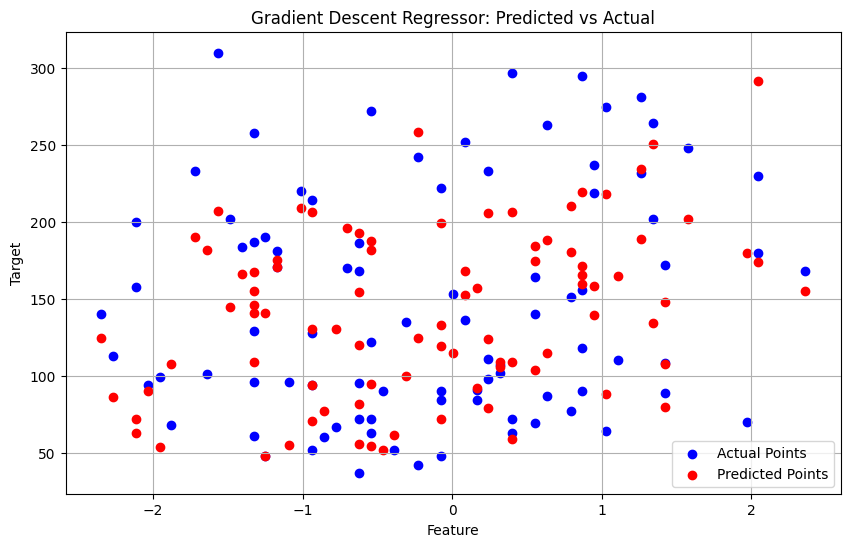

R² Score: 0.4527602260205038


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming single feature for visualization
plt.figure(figsize=(10, 6))

# Plot actual data points
plt.scatter(X_test_scaled[:, 0], y_test, color='blue', label='Actual Points')

# Plot predicted values
plt.scatter(X_test_scaled[:, 0], y_pred, color='red', label='Predicted Points')

# Draw regression line (if 1 feature)
if X_test_scaled.shape[1] == 1:
    plt.plot(X_test_scaled, y_pred, color='green', label='Regression Line')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Gradient Descent Regressor: Predicted vs Actual')
plt.grid()
plt.show()

print(f'R² Score: {r2_score(y_test, y_pred)}')

# Let me know if you want me to adjust or enhance the plot! 🚀


Final Loss: 2869.157068448282, Intercept: 154.17491000038376, Coefficients: [  1.73692984 -11.60452037  25.7500144   16.78639125 -39.15733376
  20.50863226   5.38188599  12.38520357  33.12129      2.33475719]


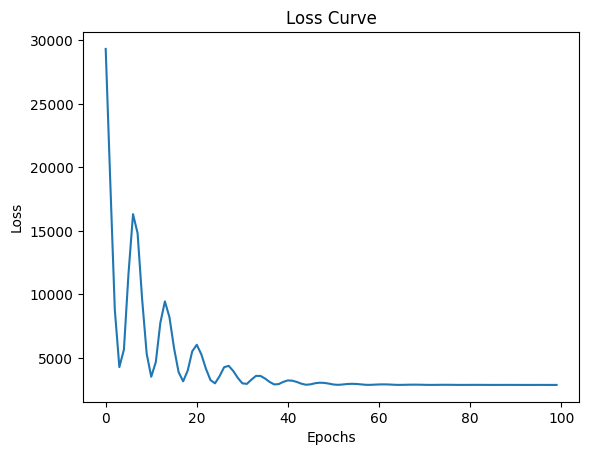

R² Score: 0.45434501508335057


In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

class GDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100, tolerance=1e-6, momentum=0.9):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.tolerance = tolerance
        self.momentum = momentum
        self.velocity_coef = 0
        self.velocity_intercept = 0

    def fit(self, X_train, y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        prev_loss = np.inf
        losses = []

        for epoch in range(self.epochs):
            y_pred = np.dot(X_train, self.coef_) + self.intercept_
            loss = np.mean((y_train - y_pred) ** 2)
            losses.append(loss)

            # Early stopping
            if np.abs(prev_loss - loss) < self.tolerance:
                print(f"Stopped early at epoch {epoch} with loss {loss}")
                break
            prev_loss = loss

            # Calculate gradients
            intercept_der = -2 * np.mean(y_train - y_pred)
            coef_der = -(2 / X_train.shape[0]) * np.dot(X_train.T, (y_train - y_pred))

            # Apply momentum
            self.velocity_intercept = (self.momentum * self.velocity_intercept) + (self.lr * intercept_der)
            self.velocity_coef = (self.momentum * self.velocity_coef) + (self.lr * coef_der)

            # Update parameters
            self.intercept_ -= self.velocity_intercept
            self.coef_ -= self.velocity_coef

        print(f'Final Loss: {loss}, Intercept: {self.intercept_}, Coefficients: {self.coef_}')

        # Plot loss curve
        plt.plot(losses)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.show()

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

# Example usage:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gdr = GDRegressor(epochs=100, learning_rate=0.1, tolerance=1e-7, momentum=0.9)
gdr.fit(X_train_scaled, y_train)

y_pred = gdr.predict(X_test_scaled)
print(f'R² Score: {r2_score(y_test, y_pred)}')

# Let me know if you want any adjustments! 🚀
